In [ ]:
%matplotlib inline
import numpy as np
import sys
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)
from skimage import measure
from skimage import filters
from skimage import exposure
pd.options.display.max_columns = None

NUM_IMGS = 14
REF = 0

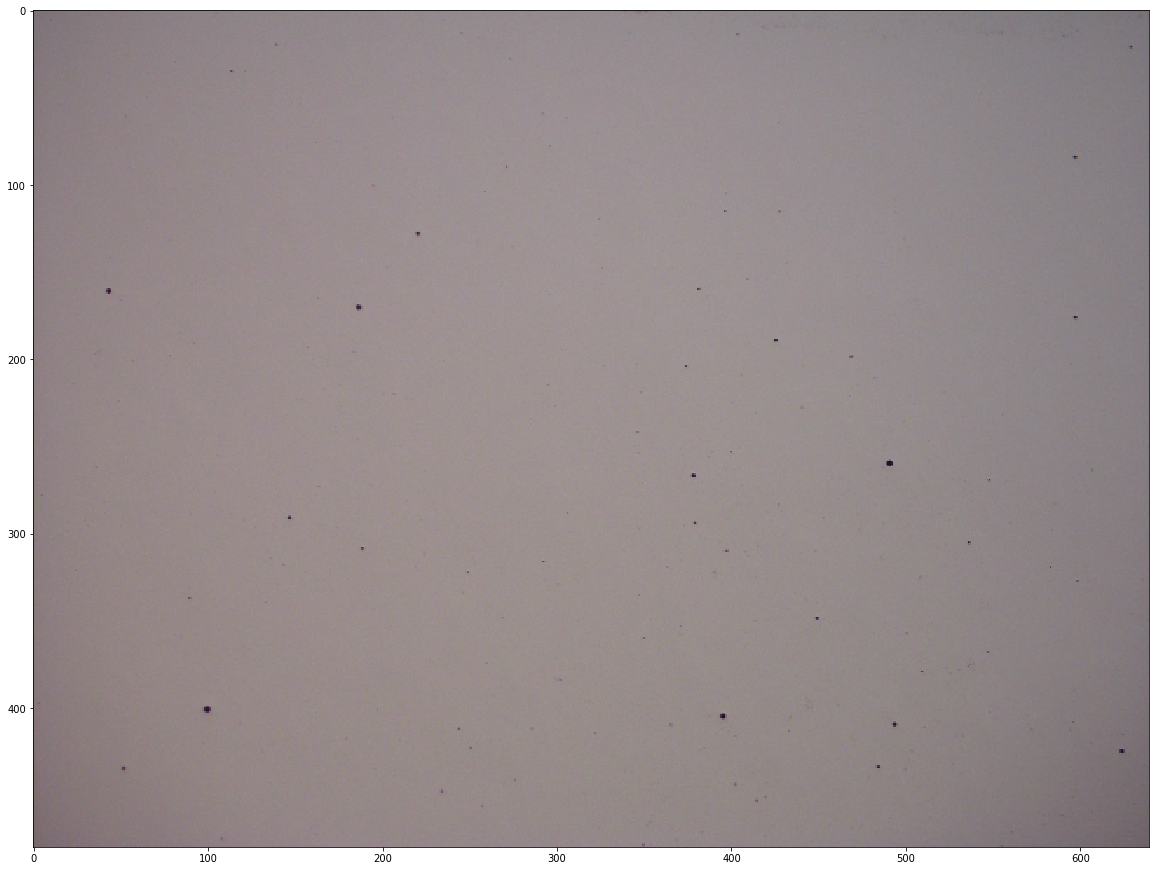

In [ ]:
imgs = []
folder = 'VM09'
#img = cv2.imread('vsm01c/3.jpg')
for i in range(NUM_IMGS):
    imgs.append(mpimg.imread(f'{folder}/{i+2}.jpg'))
#img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
plt.figure(figsize=(20,20))
plt.imshow(imgs[REF])
plt.show()

In [ ]:
gray_imgs = []

for i in range(NUM_IMGS):
    gray_imgs.append(cv2.cvtColor(imgs[i].astype(np.uint8), cv2.COLOR_RGB2GRAY))
# plt.figure(figsize=(100,100))
# plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
# plt.show()

In [ ]:
gray_imgs[0].shape

(480, 640)

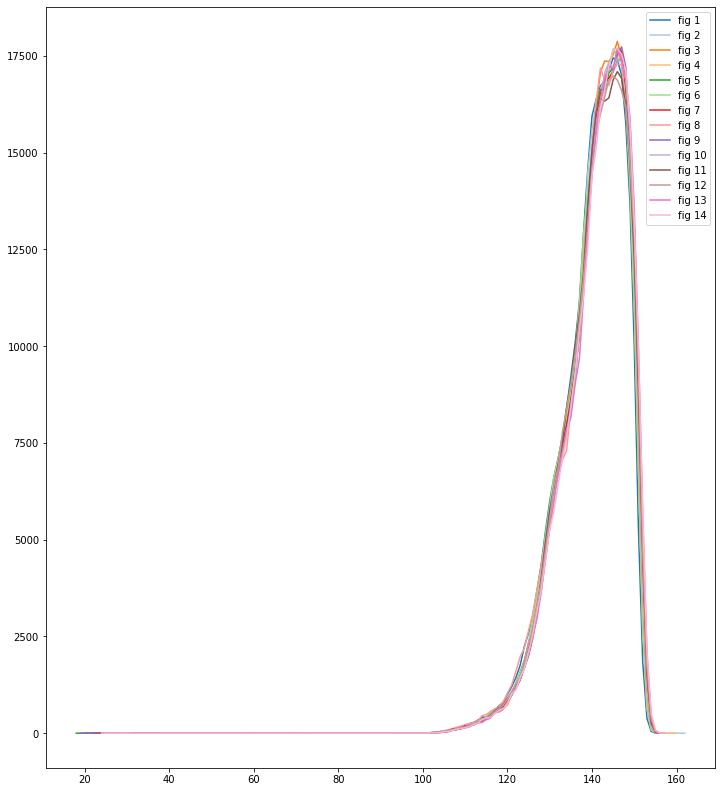

In [ ]:
hists = []
hists_centers = []

fig, ax = plt.subplots(1, 1, figsize=(12, 14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

for i in range(NUM_IMGS):
    hist, hists_center = exposure.histogram(gray_imgs[i])
    hists.append(hist)
    hists_centers.append(hists_center)
    ax.plot(hists_centers[i], hists[i], label=f'fig {i+1}')
    
    
ax.legend(loc='best')
plt.show()

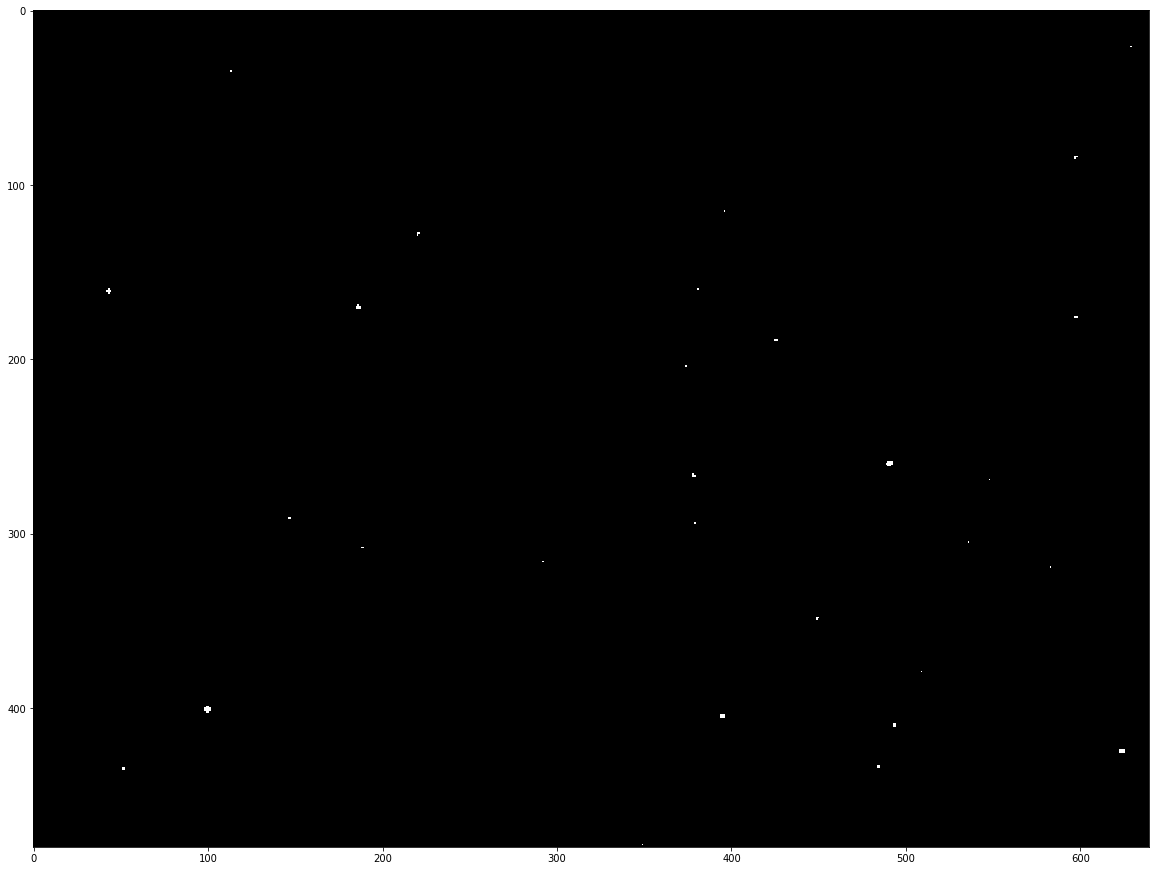

In [ ]:
threshs = []
bw_imgs = []
for i in range(NUM_IMGS):
    thresh, bw_img = cv2.threshold(gray_imgs[i], 85, 255, cv2.THRESH_BINARY_INV)
    threshs.append(thresh)
    bw_imgs.append(bw_img)
    
# (thresh, bw_img) = cv2.threshold(gray_img, 97, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(20,20))
plt.imshow(bw_imgs[REF],cmap="gray", vmin=0, vmax=255)
plt.show()

In [ ]:
np.unique(bw_imgs[REF])

array([  0, 255], dtype=uint8)

In [ ]:
blobs = []

for i in range(NUM_IMGS):
    blob = bw_imgs[i] > 0
    blobs.append(blob)

#blobs = bw_img > 0

In [ ]:
blobs_labels = []
num_labels = []

for i in range(NUM_IMGS):
    blobs_label, num_label = measure.label(blobs[i], background=0, return_num=True, connectivity=2)
    blobs_labels.append(blobs_label)
    num_labels.append(num_label)
    
# blobs_labels, num_labels = measure.label(blobs, background=0, return_num=True, connectivity=2)

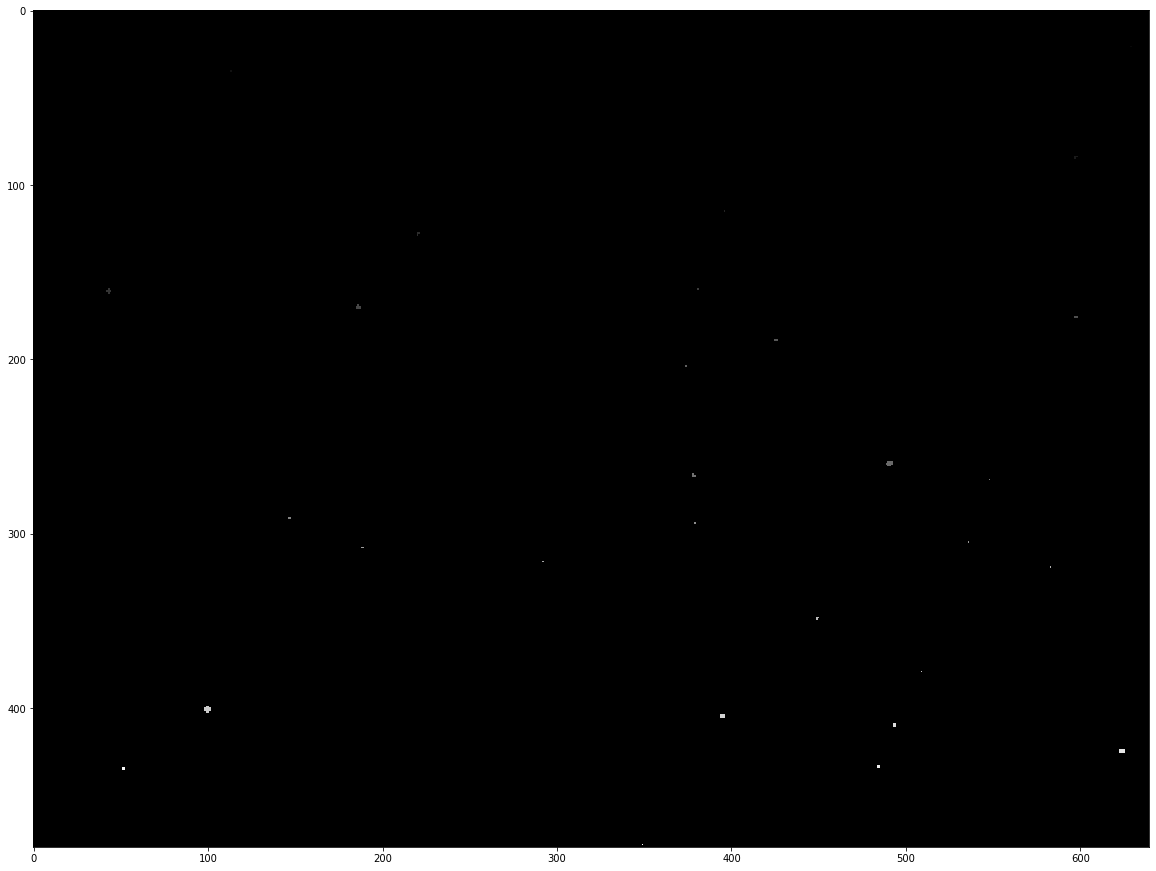

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(blobs_labels[REF], cmap="gray")
plt.show()

In [ ]:
frames = []
for i in range(NUM_IMGS):
    props = measure.regionprops_table(blobs_labels[i], blobs[i],
                               properties=['label', # The label in the labeled input image.
                                           'area', # Number of pixels of the region.
                                           'convex_area', # Number of pixels of convex hull image, which is the smallest convex polygon that encloses the region.
                                           'eccentricity', # Eccentricity of the ellipse that has the same second-moments as the region. The eccentricity is the ratio of the focal distance (distance between focal points) over the major axis length. The value is in the interval [0, 1). When it is 0, the ellipse becomes a circle.                                       
                                           'extent', # Ratio of pixels in the region to pixels in the total bounding box. Computed as area / (rows * cols)
                                           'equivalent_diameter', # The diameter of a circle with the same area as the region.
                                           'euler_number', # Euler characteristic of region. Computed as number of objects (= 1) subtracted by number of holes (8-connectivity).
                                           'major_axis_length', # The length of the major axis of the ellipse that has the same normalized second central moments as the region.
                                           'minor_axis_length', # The length of the minor axis of the ellipse that has the same normalized second central moments as the region.
                                           'max_intensity', # Value with the greatest intensity in the region.
                                           'mean_intensity', # Value with the mean intensity in the region.
                                           'min_intensity', # Value with the least intensity in the region.
                                           'orientation', # Angle between the 0th axis (rows) and the major axis of the ellipse that has the same second moments as the region, ranging from -pi/2 to pi/2 counter-clockwise.
                                           'perimeter', # Perimeter of object which approximates the contour as a line through the centers of border pixels using a 4-connectivity.
                                           'solidity', # Ratio of pixels in the region to pixels of the convex hull image.
                                           'inertia_tensor', # Inertia tensor of the region for the rotation around its mass.
                                           'inertia_tensor_eigvals']) # The eigenvalues of the inertia tensor in decreasing order.
    features = pd.DataFrame(props)
    features.index += 1
    features.orientation = features.orientation.abs()
    df_img_sum = features.sum(axis=0).to_frame().T
    df_img_sum.label = features.label.max()
    frames.append(df_img_sum)
    
vm09 = pd.concat(frames)


In [ ]:
vm07.head(20)

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1
0,21,43.0,43.0,2.664537,20.333333,30.847496,21.0,13.614761,9.847431,21.0,21.0,21.0,18.064158,24.485281,21.000000,2.153026,0.001736,0.001736,1.821393,2.432540,1.541879
0,26,41.0,41.0,3.632993,25.500000,35.309838,26.0,14.618802,8.666667,26.0,26.0,26.0,21.991149,18.828427,26.000000,1.694444,0.000000,0.000000,1.194444,1.916667,0.972222
0,17,34.0,34.0,1.755929,16.111111,24.758652,17.0,10.577254,8.128656,17.0,17.0,17.0,14.137167,19.313708,17.000000,1.711224,0.000000,0.000000,1.461224,1.792857,1.379592
0,22,39.0,40.0,6.410149,20.777778,31.530085,22.0,19.917119,7.621964,22.0,22.0,22.0,16.864335,19.449747,21.800000,2.004444,0.602222,0.602222,2.121944,3.369130,0.757259
0,48,65.0,65.0,9.816497,47.750000,61.451499,48.0,24.309401,5.333333,48.0,48.0,48.0,41.626103,11.414214,48.000000,2.472222,-0.111111,-0.111111,1.222222,3.083333,0.611111
0,39,51.0,51.0,9.000000,39.000000,49.341676,39.0,20.000000,2.000000,39.0,39.0,39.0,31.415927,4.000000,39.000000,1.500000,0.000000,0.000000,1.250000,2.500000,0.250000
0,35,50.0,50.0,5.194461,34.527778,45.174272,35.0,15.333117,6.132750,35.0,35.0,35.0,28.274334,14.242641,35.000000,1.543651,-0.111111,-0.111111,1.462018,2.154762,0.850907
0,27,38.0,38.0,4.307193,26.166667,34.688653,27.0,11.745746,4.976068,27.0,27.0,27.0,21.205750,13.071068,27.000000,1.166667,-0.361111,-0.361111,1.166667,1.777778,0.555556
0,23,45.0,45.0,5.245366,22.333333,33.703580,23.0,18.537986,9.765053,23.0,23.0,23.0,21.205750,23.656854,23.000000,2.654444,0.000000,0.000000,1.544444,2.876667,1.322222
0,40,82.0,82.0,13.654908,38.222222,60.938738,40.0,41.481809,18.509876,40.0,40.0,40.0,37.699112,45.727922,40.000000,5.081746,0.444444,0.444444,3.418481,6.176190,2.324036


In [ ]:
vm08.head(30)

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1
0,41,74.0,75.0,11.107246,38.627778,57.521911,41.0,33.412898,9.888875,41.0,41.0,41.0,34.404930,31.313708,40.923077,4.624484,-0.733175,-0.733175,3.339206,6.654991,1.308699
0,47,85.0,86.0,7.278285,45.875000,64.439212,47.0,29.435891,10.385026,47.0,47.0,47.0,34.078126,33.692388,46.944444,5.126201,0.265283,0.265283,4.074394,7.694641,1.505955
0,20,38.0,41.0,4.211632,19.138889,28.550933,20.0,14.903710,7.043953,20.0,20.0,20.0,16.948238,17.035534,19.577778,2.113202,-0.271365,-0.271365,1.990753,2.987791,1.116163
0,18,39.0,39.0,5.245366,16.916667,27.587595,18.0,18.305210,8.210036,18.0,18.0,18.0,12.566371,21.656854,18.000000,1.903026,-0.506200,-0.506200,2.403026,3.190476,1.115575
0,16,56.0,59.0,3.312233,15.062500,29.581495,16.0,24.301061,14.247997,16.0,16.0,16.0,12.827594,41.278175,15.800000,3.165639,0.770792,0.770792,6.533695,7.333040,2.366294
0,23,29.0,29.0,1.816497,22.250000,28.374521,23.0,7.137828,3.333333,23.0,23.0,23.0,18.064158,7.414214,23.000000,0.722222,0.361111,0.361111,0.722222,1.083333,0.361111
0,58,74.0,74.0,5.465986,56.583333,71.485634,58.0,17.447229,6.879800,58.0,58.0,58.0,45.308115,18.485281,58.000000,1.684240,-0.278345,-0.278345,2.010771,2.916667,0.778345
0,37,69.0,72.0,8.415746,36.077778,52.028162,37.0,26.943192,9.749013,37.0,37.0,37.0,29.874819,29.278175,36.823529,4.233469,-0.385306,-0.385306,2.979796,5.564538,1.648727
0,14,55.0,57.0,3.215551,13.005102,23.652043,14.0,15.230660,8.726983,14.0,14.0,14.0,11.303119,25.106602,13.948718,3.570997,0.499067,0.499067,3.978735,4.708270,2.841462
0,25,34.0,34.0,2.723885,24.777778,31.359932,25.0,8.848056,2.471346,25.0,25.0,25.0,19.381405,7.207107,25.000000,1.156463,-0.183673,-0.183673,0.943878,1.718618,0.381722


In [ ]:
vm09.head(20)

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1
0,29,89.0,89.0,9.919677,26.833333,52.841949,29.0,43.038577,27.287724,29.0,29.0,29.0,28.705419,68.041631,29.000000,6.749206,0.370370,0.370370,4.488561,7.248454,3.989313
0,14,41.0,41.0,5.315510,13.333333,25.153057,14.0,21.483958,12.132740,14.0,14.0,14.0,14.659532,29.449747,14.000000,3.362718,-0.259871,-0.259871,1.787821,3.513886,1.636653
0,16,62.0,63.0,5.053161,14.407937,30.755106,16.0,26.094672,16.051692,16.0,16.0,16.0,12.048127,44.627417,15.960000,4.983333,-1.291667,-1.291667,3.967708,6.315387,2.635655
0,22,67.0,69.0,7.070198,21.045238,37.639612,22.0,28.764476,13.746939,22.0,22.0,22.0,17.635983,41.556349,21.916667,5.614096,-1.216483,-1.216483,3.530073,6.979714,2.164455
0,25,55.0,56.0,12.873346,23.652778,39.736524,25.0,35.474981,10.208957,25.0,25.0,25.0,24.693012,26.071068,24.750000,4.299320,-0.233560,-0.233560,2.595805,5.662353,1.232772
0,23,39.0,39.0,1.816497,22.305556,32.026033,23.0,12.839223,9.863155,23.0,23.0,23.0,18.849556,21.071068,23.000000,1.622222,-0.111111,-0.111111,1.372222,1.733333,1.261111
0,28,64.0,64.0,9.504252,26.750000,44.665668,28.0,32.693517,15.250442,28.0,28.0,28.0,24.347343,40.278175,28.000000,4.355351,-0.551111,-0.551111,3.041151,5.488095,1.908407
0,15,42.0,42.0,6.265986,13.833333,26.109523,15.0,21.856298,11.618563,15.0,15.0,15.0,13.030018,29.106602,15.000000,2.893333,-0.231111,-0.231111,2.323333,3.516667,1.700000
0,19,47.0,47.0,2.766887,17.833333,30.919119,19.0,17.689950,15.064917,19.0,19.0,19.0,15.707963,35.313708,19.000000,2.577098,-0.222222,-0.222222,2.495465,2.880952,2.191610
0,18,33.0,33.0,4.581139,17.333333,26.226512,18.0,15.656854,7.464102,18.0,18.0,18.0,16.493361,17.242641,18.000000,2.000000,0.000000,0.000000,1.125000,2.250000,0.875000


In [ ]:
total_vm = [vm07, vm08, vm09]

In [ ]:
df_vm = pd.concat(total_vm)

In [ ]:
df_vm['laser_num'] = 'multiple'
df_vm['laser_angle'] = 'vertical'
df_vm['scan_strategy'] = 'stripe'
df_vm['creep rate'] = 0.00273

In [ ]:
df_vm.head()

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1,laser_num,laser_angle,scan_strategy,creep rate
0,21,43.0,43.0,2.664537,20.333333,30.847496,21.0,13.614761,9.847431,21.0,21.0,21.0,18.064158,24.485281,21.0,2.153026,0.001736,0.001736,1.821393,2.432540,1.541879,multiple,vertical,stripe,0.00273
0,26,41.0,41.0,3.632993,25.500000,35.309838,26.0,14.618802,8.666667,26.0,26.0,26.0,21.991149,18.828427,26.0,1.694444,0.000000,0.000000,1.194444,1.916667,0.972222,multiple,vertical,stripe,0.00273
0,17,34.0,34.0,1.755929,16.111111,24.758652,17.0,10.577254,8.128656,17.0,17.0,17.0,14.137167,19.313708,17.0,1.711224,0.000000,0.000000,1.461224,1.792857,1.379592,multiple,vertical,stripe,0.00273
0,22,39.0,40.0,6.410149,20.777778,31.530085,22.0,19.917119,7.621964,22.0,22.0,22.0,16.864335,19.449747,21.8,2.004444,0.602222,0.602222,2.121944,3.369130,0.757259,multiple,vertical,stripe,0.00273
0,48,65.0,65.0,9.816497,47.750000,61.451499,48.0,24.309401,5.333333,48.0,48.0,48.0,41.626103,11.414214,48.0,2.472222,-0.111111,-0.111111,1.222222,3.083333,0.611111,multiple,vertical,stripe,0.00273


In [ ]:
df_vm.describe()

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1,creep rate
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01
mean,23.977273,46.886364,47.318182,5.462781,23.101104,34.785802,23.977273,19.262182,8.931035,23.977273,23.977273,23.977273,20.128139,22.929190,23.940881,2.619427,-0.065797,-0.065797,2.112891,3.433011,1.299307,2.730000e-03
std,11.351649,18.144403,18.423661,3.149554,11.149838,14.327873,11.351649,9.120814,4.845164,11.351649,11.351649,11.351649,9.377819,13.020992,11.351925,1.467719,0.417566,0.417566,1.276619,1.947110,0.797780,4.386947e-19
min,2.000000,2.000000,2.000000,0.000000,2.000000,2.256758,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.570796,0.000000,2.000000,0.000000,-1.291667,-1.291667,0.000000,0.000000,0.000000,2.730000e-03
25%,16.000000,36.500000,36.500000,2.756136,15.765625,25.870407,16.000000,14.367792,5.998364,16.000000,16.000000,16.000000,12.979412,14.105078,15.990000,1.668736,-0.237670,-0.237670,1.215278,2.136905,0.747632,2.730000e-03
50%,22.000000,42.500000,42.500000,5.245366,21.244841,31.139525,22.000000,17.997580,8.696825,22.000000,22.000000,22.000000,18.064158,21.553301,22.000000,2.312624,0.000000,0.000000,1.804607,2.952229,1.130449,2.730000e-03
75%,28.000000,56.500000,58.250000,7.195972,26.750000,40.968810,28.000000,24.303146,10.252974,28.000000,28.000000,28.000000,24.433760,29.149495,28.000000,3.214909,0.023978,0.023978,2.887698,4.489435,1.661545,2.730000e-03
max,58.000000,89.000000,89.000000,13.654908,56.583333,71.485634,58.000000,43.038577,27.287724,58.000000,58.000000,58.000000,45.308115,68.041631,58.000000,6.749206,0.770792,0.770792,6.533695,7.694641,3.989313,2.730000e-03


In [ ]:

df_vm.to_csv('df_vm_no_anomaly.csv',index=False)

# Compilation of data

In [ ]:
df_vss = pd.read_csv('df_vss.csv')
df_vss['conditions'] = 'vss'

df_vsm = pd.read_csv('df_vsm.csv')
df_vsm['conditions'] = 'vsm'

df_vm = pd.read_csv('df_vm_no_anomaly.csv')
df_vm['conditions'] = 'vm'

df_hs = pd.read_csv('df_hs.csv')
df_hs['conditions'] = 'hs'

df_hm = pd.read_csv('df_hm.csv')
df_hm['conditions'] = 'hm'

df_abvsm = pd.read_csv('df_abvsm.csv')
df_abvsm['conditions'] = 'abvsm'

df_45s = pd.read_csv('df_45s.csv')
df_45s['conditions'] = '45s'

df_45m = pd.read_csv('df_45m.csv')
df_45m['conditions'] = '45m'

In [ ]:
df_vss.head()

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1,laser_num,laser_angle,scan_strategy,creep rate,conditions
0,69,657.0,842.0,27.191131,64.273249,137.923174,69.0,197.678696,38.219010,69.0,69.0,69.0,53.440014,324.929978,67.375015,22.606415,10.805306,10.805306,617.792308,630.286944,10.111779,single,vertical,stripe,0.00404,vss
1,40,79.0,79.0,10.203543,39.205357,56.299295,40.0,29.624909,8.406865,40.0,40.0,40.0,32.163169,29.106602,40.000000,3.609285,1.030846,1.030846,4.616042,6.544586,1.680740,single,vertical,stripe,0.00404,vss
2,34,162.0,167.0,9.278508,30.878214,69.589720,34.0,55.362821,38.568840,34.0,34.0,34.0,28.525094,111.876154,33.712464,13.107236,-0.954870,-0.954870,10.416099,15.010144,8.513191,single,vertical,stripe,0.00404,vss
3,41,179.0,189.0,16.279072,38.506151,79.875924,41.0,69.916119,33.714020,41.0,41.0,41.0,36.579604,111.597980,40.595798,15.279640,-0.641764,-0.641764,12.039322,20.327769,6.991193,single,vertical,stripe,0.00404,vss
4,46,137.0,157.0,12.433923,42.655952,76.379803,46.0,59.438177,26.570201,46.0,46.0,46.0,39.808878,85.077164,45.130120,14.567540,3.495337,3.495337,10.381122,19.943975,5.004687,single,vertical,stripe,0.00404,vss


In [ ]:
df_vsm.head()

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1,laser_num,laser_angle,scan_strategy,creep rate,conditions
0,41,97.0,97.0,11.617803,39.173611,64.214737,41.0,42.079622,19.977597,41.0,41.0,41.0,35.220428,57.798990,41.000000,7.216235,-0.020874,-0.020874,4.342935,8.517885,3.041284,single,vertical,meander,0.00239,vsm
1,39,73.0,73.0,10.588459,37.250000,57.073885,39.0,34.010518,16.350853,39.0,39.0,39.0,31.415927,39.349242,39.000000,3.611111,-0.166667,-0.166667,3.298611,4.972222,1.937500,single,vertical,meander,0.00239,vsm
2,49,141.0,145.0,12.299342,47.339506,77.796389,49.0,48.387811,25.624353,49.0,49.0,49.0,42.393099,70.698485,48.925926,9.707986,0.608412,0.608412,7.229907,11.170511,5.767383,single,vertical,meander,0.00239,vsm
3,37,73.0,73.0,12.713409,35.500000,54.696307,37.0,36.652815,13.436722,37.0,37.0,37.0,31.121925,34.863961,37.000000,4.277778,-0.555556,-0.555556,3.472222,6.095061,1.654939,single,vertical,meander,0.00239,vsm
4,56,119.0,120.0,12.974749,54.744444,81.312481,56.0,42.031088,18.416970,56.0,56.0,56.0,49.907977,50.970563,55.960000,6.971740,0.322917,0.322917,4.884137,8.233633,3.622245,single,vertical,meander,0.00239,vsm


In [ ]:
cols = ['label',
 'area',
 'convex_area',
 'eccentricity',
 'extent',
 'equivalent_diameter',
 'euler_number',
 'major_axis_length',
 'minor_axis_length',
 'max_intensity',
 'mean_intensity',
 'min_intensity',
 'orientation',
 'perimeter',
 'solidity',
 'inertia_tensor-0-0',
 'inertia_tensor-0-1',
 'inertia_tensor-1-0',
 'inertia_tensor-1-1',
 'inertia_tensor_eigvals-0',
 'inertia_tensor_eigvals-1',
 'laser_num',
 'laser_angle',
 'scan_strategy',
 'conditions',
 'creep rate']

In [ ]:
# orignal
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly.csv',index=False)

# upsampled
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled.csv',index=False)

# without 45m
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_45m.csv',index=False)

# without 45s
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45m,df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45m,df_45s]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_45s.csv',index=False)

# without hm
df_all = [df_vss,df_vsm,df_vm,df_hs,df_abvsm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hs,df_abvsm,df_45s,df_45m,df_hm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_hm.csv',index=False)

# without hs
df_all = [df_vss,df_vsm,df_vm,df_hm,df_abvsm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hm,df_abvsm,df_45s,df_45m,df_hs]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_hs.csv',index=False)

# without vm
df_all = [df_vss,df_vsm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vss,df_vsm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_vm.csv',index=False)

# without vsm
df_all = [df_vss,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vss,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vsm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_vsm.csv',index=False)

# without vss
df_all = [df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m,df_vss]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_vss.csv',index=False)

# without abvsm
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_abvsm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No anomaly data/complete_creep_no_anomaly_upsampled_unseen_abvsm.csv',index=False)




In [ ]:
## No ABVSM
# orignal
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm.csv',index=False)

# upsampled
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled.csv',index=False)

# without 45m
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_45m.csv',index=False)

# without 45s
df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_45m,df_vss,df_vsm,df_vm,df_hs,df_hm,df_45m,df_45s]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_45s.csv',index=False)

# without hm
df_all = [df_vss,df_vsm,df_vm,df_hs,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hs,df_45s,df_45m,df_hm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_hm.csv',index=False)

# without hs
df_all = [df_vss,df_vsm,df_vm,df_hm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hm,df_45s,df_45m,df_hs]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_hs.csv',index=False)

# without vm
df_all = [df_vss,df_vsm,df_hs,df_hm,df_45s,df_45m,df_vss,df_vsm,df_hs,df_hm,df_45s,df_45m,df_vm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_vm.csv',index=False)

# without vsm
df_all = [df_vss,df_vm,df_hs,df_hm,df_45s,df_45m,df_vss,df_vm,df_hs,df_hm,df_45s,df_45m,df_vsm]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_vsm.csv',index=False)

# without vss
df_all = [df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_vss]
all_frames = pd.concat(df_all)
all_frames = all_frames[cols]
all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_vss.csv',index=False)

# # without abvsm
# df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_vss,df_vsm,df_vm,df_hs,df_hm,df_45s,df_45m,df_abvsm]
# all_frames = pd.concat(df_all)
# all_frames = all_frames[cols]
# all_frames.to_csv('No ABVSM/complete_creep_no_abvsm_upsampled_unseen_abvsm.csv',index=False)

In [ ]:
#df_all = [df_vss,df_vsm,df_vm,df_hs,df_hm,df_abvsm,df_45s,df_45m]
all_frames = pd.concat(df_all)
#all_frames.to_csv('complete_creep_no_anomaly.csv',index=False)

,label,area,convex_area,eccentricity,extent,equivalent_diameter,euler_number,major_axis_length,minor_axis_length,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,inertia_tensor_eigvals-0,inertia_tensor_eigvals-1,laser_num,laser_angle,scan_strategy,creep rate,conditions
0,69,657.0,842.0,27.191131,64.273249,137.923174,69.0,197.678696,38.219010,69.0,69.0,69.0,53.440014,324.929978,67.375015,22.606415,10.805306,10.805306,617.792308,630.286944,10.111779,single,vertical,stripe,0.00404,vss
1,40,79.0,79.0,10.203543,39.205357,56.299295,40.0,29.624909,8.406865,40.0,40.0,40.0,32.163169,29.106602,40.000000,3.609285,1.030846,1.030846,4.616042,6.544586,1.680740,single,vertical,stripe,0.00404,vss
2,34,162.0,167.0,9.278508,30.878214,69.589720,34.0,55.362821,38.568840,34.0,34.0,34.0,28.525094,111.876154,33.712464,13.107236,-0.954870,-0.954870,10.416099,15.010144,8.513191,single,vertical,stripe,0.00404,vss
3,41,179.0,189.0,16.279072,38.506151,79.875924,41.0,69.916119,33.714020,41.0,41.0,41.0,36.579604,111.597980,40.595798,15.279640,-0.641764,-0.641764,12.039322,20.327769,6.991193,single,vertical,stripe,0.00404,vss
4,46,137.0,157.0,12.433923,42.655952,76.379803,46.0,59.438177,26.570201,46.0,46.0,46.0,39.808878,85.077164,45.130120,14.567540,3.495337,3.495337,10.381122,19.943975,5.004687,single,vertical,stripe,0.00404,vss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,29,55.0,55.0,7.632993,28.055556,43.087667,29.0,27.148624,13.196489,29.0,29.0,29.0,22.776547,28.485281,29.000000,2.594444,-0.222222,-0.222222,2.594444,3.566667,1.622222,multiple,45,stripe,0.00305,45m
16,31,63.0,63.0,8.449800,30.194444,46.393509,31.0,28.258020,12.442151,31.0,31.0,31.0,27.488936,33.485281,31.000000,3.849206,-0.250000,-0.250000,2.600907,4.765873,1.684240,multiple,45,stripe,0.00305,45m
17,26,58.0,58.0,10.225090,24.527778,41.297018,26.0,31.144719,14.320322,26.0,26.0,26.0,19.313204,36.899495,26.000000,3.383129,-0.453333,-0.453333,3.165595,4.838095,1.710629,multiple,45,stripe,0.00305,45m
18,23,56.0,57.0,5.544506,21.416667,36.904202,23.0,23.388350,15.829708,23.0,23.0,23.0,18.385908,39.727922,22.857143,3.277778,0.055556,0.055556,3.027778,4.000000,2.305556,multiple,45,stripe,0.00305,45m


In [ ]:
all_frames.describe()

In [ ]:
features = pd.DataFrame(props)
features.index += 1
features.head(50)

In [ ]:
features.describe()

In [ ]:
frames = [df_img_0_sum, df_img_1_sum]

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(blobs_labels[REF],cmap='nipy_spectral')
plt.show()

In [ ]:
# convert to white background
for k in range(NUM_IMGS):
    black_blob_label = blobs_labels[k]
    for i in range(black_blob_label.shape[0]):
        for j in range(black_blob_label.shape[1]):
            if black_blob_label[i, j] == 0:
                black_blob_label[i, j] = 255
    
    blobs_labels[k] = black_blob_label          


plt.figure(figsize=(20,20))
plt.imshow(blobs_labels[REF],cmap='cubehelix')
plt.show()


# for i in range(blobs_labels.shape[0]):
#     for j in range(blobs_labels.shape[1]):
#         if blobs_labels[i, j] == 0:
#             blobs_labels[i, j] = 255

In [ ]:
uniques = []
counts = []

for i in range(NUM_IMGS):
    unique, count = np.unique(blobs_labels[i], return_counts=True)
    uniques.append(unique)
    counts.append(count)

In [ ]:
np.asarray((uniques[REF], counts[REF])).T

In [ ]:
num_of_holes = uniques[REF][-2]
f"The are {num_of_holes} holes in this image."

In [ ]:
percentage_hole_area = (np.sum(counts[REF][:-1])/np.sum(counts[REF][:]))*100
f"The percentage of area with holes is {percentage_hole_area}%"

In [ ]:
largest_hole_area = (np.sort(counts[REF])[-2]/np.sum(counts[REF]))*100
f"The percentage of the largest hole area is {largest_hole_area}%"